## **EASY VISA Exploratory Data Analysis**

In this project, I will apply my data science and machine learning skills to develop a predictive model for Easy Visa Dataset. This project will involve data cleaning, exploratory data analysis (EDA), data preprocessing, model training, hyperparameter tuning and evaluation.

In [56]:
# Import necessary libraries

import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


#### **Phase 1: Data Collection and Preparation**

Task 1.1: Data Loading and Ingestion

In [57]:
# Loading dataset from github
url = r"https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/EasyVisa%20(1).csv"

print("Data loaded successfully!")

Data loaded successfully!


Task 1.2: Loading dataset into a Pandas DataFrame

In [58]:
# Checking the snapshot of the dataset
data = pd.read_csv(url)
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Task 1.3: Inspecting the dataset for missing values and handle them appropriately

In [59]:
# Checking for missing values
print(f"Snapshot of the dataset showing the missing values: ")
data.isna().sum()

Snapshot of the dataset showing the missing values: 


case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

Task 1.4: Performing data cleaning to ensure the dataset is ready for analysis

In [60]:
# Checking for datatypes
data.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [61]:
# Checking for duplicated values
print(f"The number of duplicated values in the dataset is: {data.duplicated().sum()}")

The number of duplicated values in the dataset is: 0


In [62]:
# I will be dropping the Loan Id so as not to disrupt my operation
data = data.drop(columns=["case_id"])

#### **Phase 2: Exploratory Data Analysis (EDA)**

Task 2.1: Conducting EDA to understand the distribution of features and the target variable.


In [63]:
print("The below shows the information of the dataset:")
data.info()

The below shows the information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


In [64]:
# Checking the shape of the dataset
print(f"The shape of the dataset:")
print("--------------------------")

# Unpacking the dataset
rows, columns = data.shape
print(f"Number of rows: {rows}\nNumber of columns: {columns}")

The shape of the dataset:
--------------------------
Number of rows: 25480
Number of columns: 11


In [65]:
# Checking the statistical description of the dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


|Feature    |Distribution   |Outliers   |Spread |
|-----------|---------------|-----------|-------|
|no_of_employees|widely distributed|Heavily present|Widely spread|

The above show only the numerical distribution. However, I will need to group my categorical features so as to get their respective descriptions as well.

In [66]:
# Grouping my categorical features
cat_col = data.select_dtypes(include="object").columns
cat_col

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [77]:
# I want to perform the description on the categorical features as well.
for col in cat_col:
    print("Feature:", col)
    print("----------------------")
    print(data[col].value_counts())
    print("")

Feature: continent
----------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

Feature: education_of_employee
----------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

Feature: has_job_experience
----------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64

Feature: requires_job_training
----------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64

Feature: region_of_employment
----------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64

Feature: unit_of_wage
----------------------
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64

Feature: full_ti

Task 2.2: Visualize the relationships between features and the target variable using scatter plots, histograms, and box plots.

In [91]:
# Here, I will be using histograms and box plots on visualizing the numerical features only while using scatter plots on categorical features

def numerical_relationship(data, column):
    # Stating the figure size
    plt.figure(figsize=(12,6))
    print("Visual Distribution of the Numerical Features")
    
    # Plotting Histogram
    plt.subplot(1,2,1)
    sns.histplot(data=data, x= data[column], kde=True, bins=30)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    # Plotting Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=data, x=data[column])
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()


In [80]:
# Let's group my numerical features
num_col = data.select_dtypes(include="number").columns
num_col

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

Visual Distribution of the Numerical Features


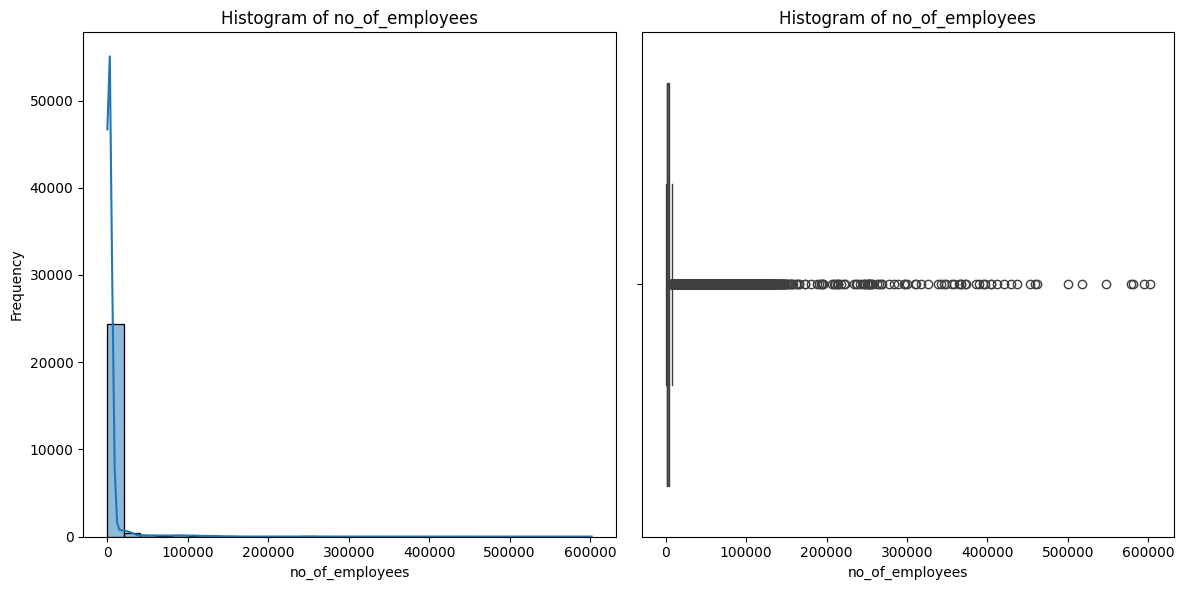

Visual Distribution of the Numerical Features


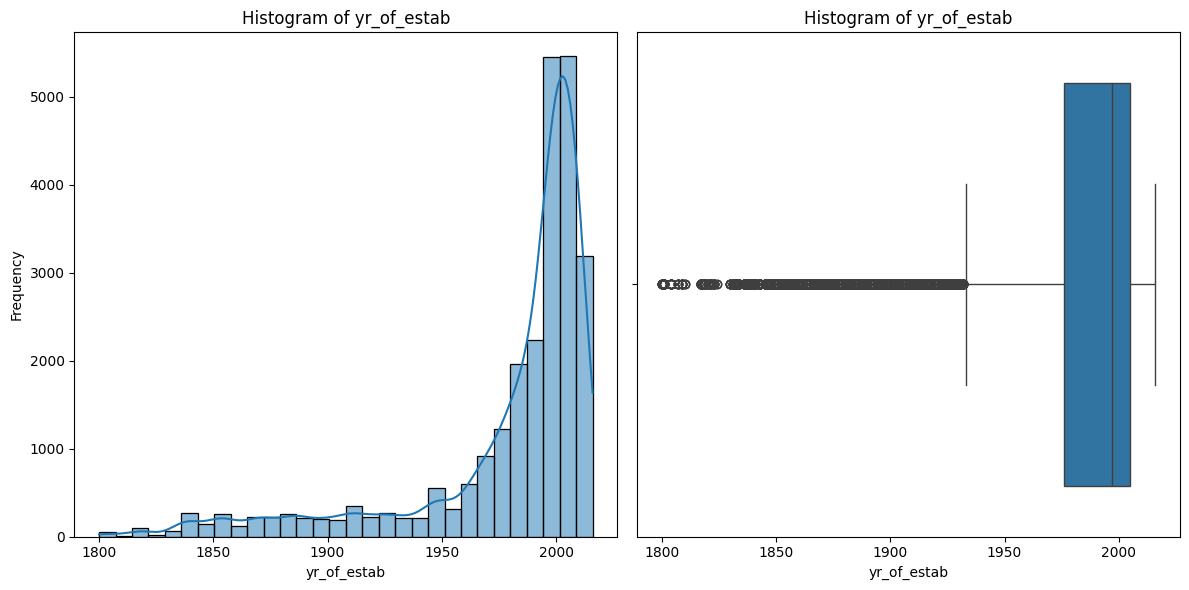

Visual Distribution of the Numerical Features


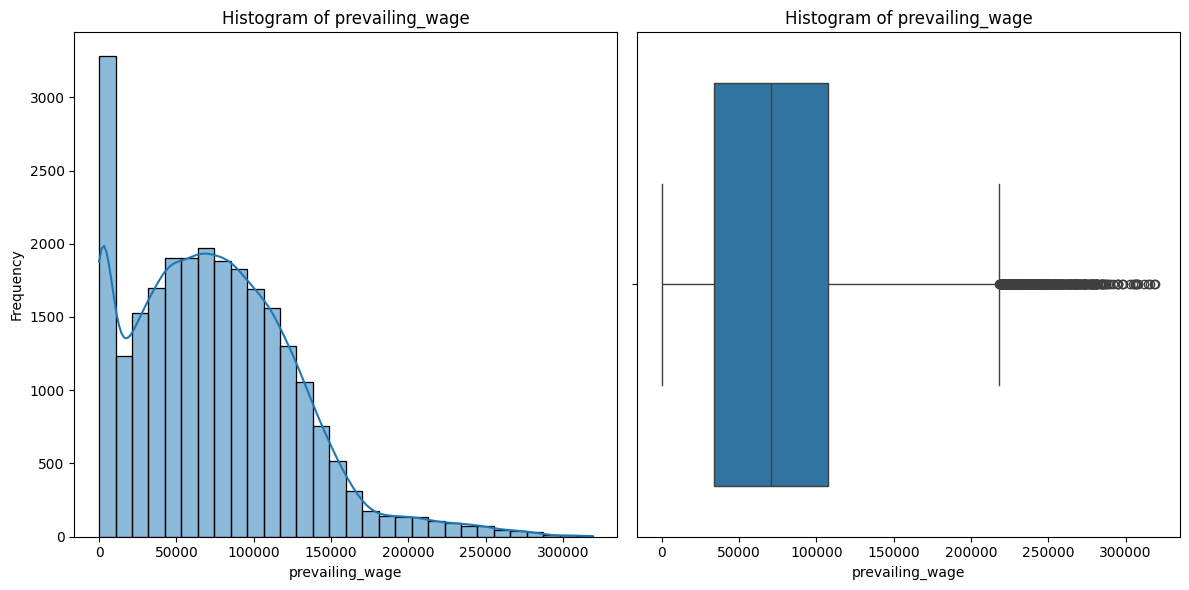

In [93]:
for col in num_col:
    numerical_relationship(data, col)

### **Phase3: Data Preprocessing**